In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
#Plot of customers per each city
customers_count = pd.DataFrame(df['City'].value_counts())
customers_count

,City
Yangon,340
Mandalay,332
Naypyitaw,328


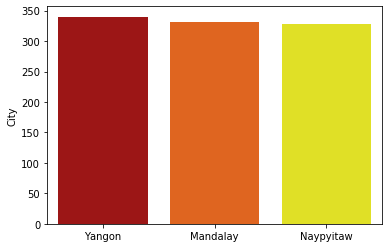

In [7]:
sns.barplot(x = customers_count.index  , y = customers_count['City'], palette = 'hot')

In [8]:
#plot of different payment methods count
payment_methods = pd.DataFrame(df['Payment'].value_counts())
payment_methods

,Payment
Ewallet,345
Cash,344
Credit card,311


([<matplotlib.patches.Wedge at 0x22dd453ff28>,
 [Text(0.5147227993273717, 0.9721421911698896, 'Ewallet'),
  Text(-1.093730866010994, -0.11727230165235786, 'Cash'),
  Text(0.6154305139598073, -0.9117265393127303, 'Credit card')],
 [Text(0.28075789054220274, 0.530259377001758, '34%'),
  Text(-0.596580472369633, -0.06396670999219518, '34%'),
  Text(0.33568937125080395, -0.49730538507967104, '31%')])

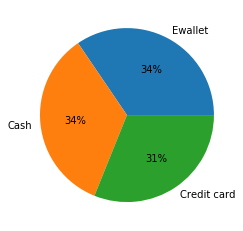

In [9]:
plt.pie(payment_methods.Payment , labels = payment_methods.index,autopct='%.0f%%')


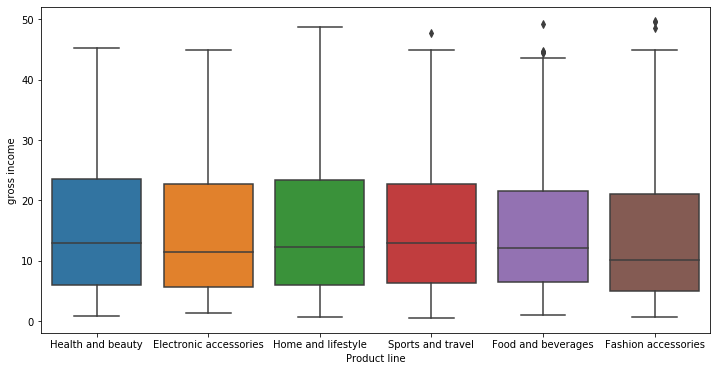

In [10]:
#plot of gross income for each product line
plt.figure(figsize= (12,6))
sns.boxplot(x = df['Product line'], y = df['gross income'])

([<matplotlib.axis.XTick at 0x22dd4843b38>,
 <a list of 11 Text xticklabel objects>)

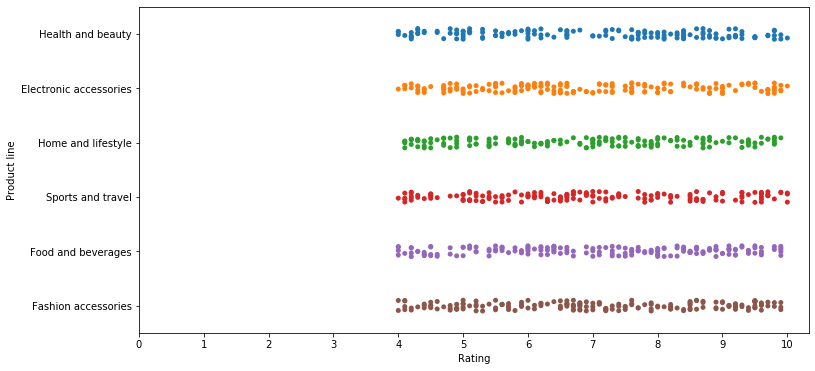

In [11]:
#plot of rating for each product line
x_data = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.stripplot(y = df['Product line'], x = df['Rating'])
plt.xticks(x_data)

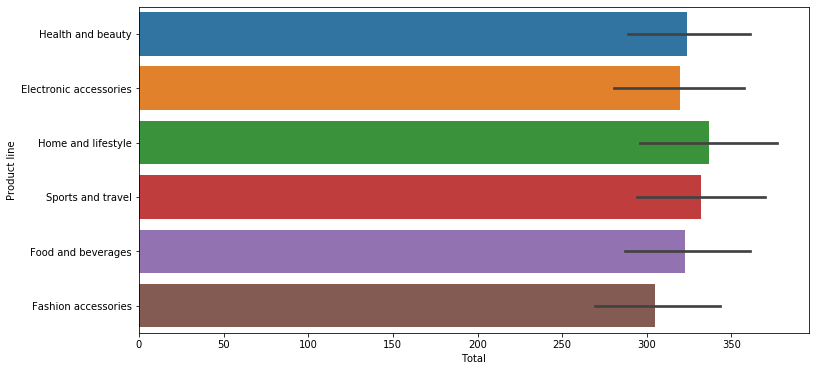

In [12]:
#plot for total bill in each product line
plt.figure(figsize = (12,6))
sns.barplot(x = df['Total'] , y = df['Product line'])

In [13]:
df = df.drop(columns='gross margin percentage')

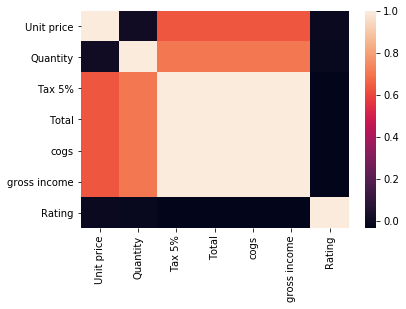

In [14]:
#heatmap
sns.heatmap(df.corr())